In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.metrics import mean_squared_error
from scipy import stats
import numpy as np

In [12]:
top_df = pd.read_csv('top_oligomers_properties.csv')
gfn_df = pd.read_csv('top_oligomers_gfn2.csv')
previous_df = pd.read_csv('previous_data.csv')

# Figure S2 - Common monomers in the top 20 oligomers

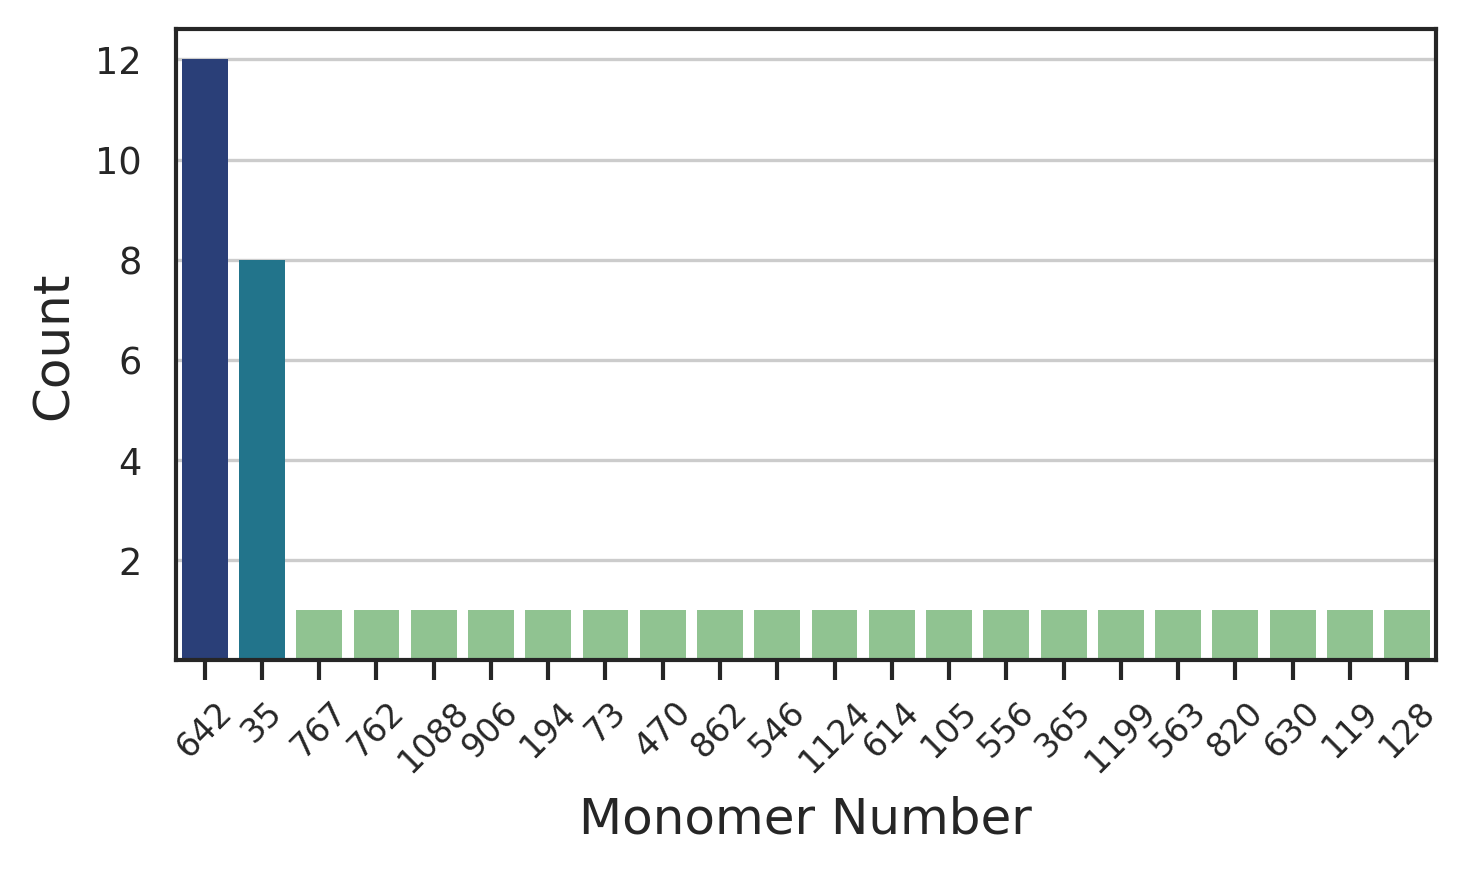

In [10]:
monomers_list = pd.concat([gfn_df['Monomer1'], gfn_df['Monomer2']]).reset_index(drop = True)

fig, ax = plt.subplots(1, 1, figsize = (5,3), dpi = 300,  facecolor='w', edgecolor='k')
sns.set_style("white", {'xtick.bottom': True})#, 'ytick.left': True, 'xtick.color': 'gray', 'xtick.labelcolor': 'k'})
sns.set_context("paper")
ax.grid()
data = monomers_list.value_counts()
pal = sns.color_palette('crest', (max(data)))
sns.countplot(x = monomers_list, ax = ax, order = monomers_list.value_counts().index, palette = [pal[x-1] for x in data], linewidth=0, saturation=1)
#ax.set_xticks(np.arange(0,1225,100))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45, fontsize=8)
ax.set_yticks([2,4,6,8,10,12])
#sns.set(font_scale = 0.5)
ax.set_xlabel('Monomer Number', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.tight_layout()
plt.savefig('../figures/top20_oligomers_histogram.png')
plt.show()

# Figure S3 - Correlation between HOMO-LUMO gap and $\Delta E_{T-S}$ of the top oligomers

In [17]:
top_df.head()

,Name,Monomer1,Monomer2,Singlet Energy,Singlet HOMO,Singlet LUMO,Singlet Gap,Triplet Energy,E_TS
0,642_630,642,630,-124476.242000,-5.256532,-4.945424,0.311108,-124479.115031,-2.873031
1,767_642,767,642,-142760.679298,-5.145346,-4.679678,0.465668,-142763.436398,-2.757100
2,642_1124,642,1124,-121203.537534,-4.825939,-4.320270,0.505669,-121206.351595,-2.814060
3,365_642,365,642,-213196.890469,-4.901614,-4.438259,0.463355,-213200.865381,-3.974911
4,563_35,563,35,-111407.431893,-4.519294,-4.041707,0.477587,-111410.263256,-2.831362


In [23]:
top_df['Monomer1']

0      642
1      767
2      642
3      365
4      563
5      470
6      128
7     1199
8      194
9      762
10     642
11    1088
12     862
13     614
14     128
15      73
16     820
Name: Monomer1, dtype: int64

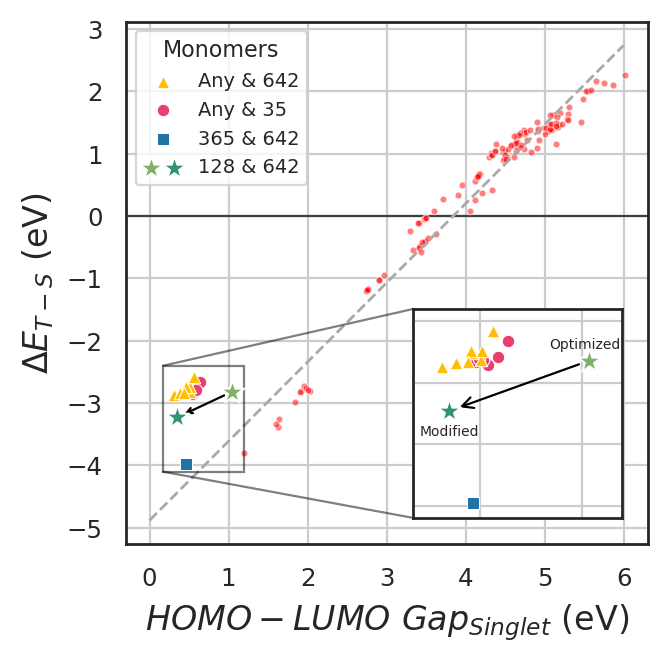

In [28]:
m642 = top_df.loc[(((top_df['Monomer1'] == 642) | (top_df['Monomer2'] == 642)) & (~top_df['Monomer1'].isin([128,365])))]
m35 = top_df.loc[((top_df['Monomer1'] == 35) | (top_df['Monomer2'] == 35))]
m128_642 = top_df.loc[top_df['Name'] == '128_642']
modified = top_df.loc[(top_df['Name'] == '128_642_open')]
m365 = top_df.loc[((top_df['Monomer1'] == 365) | (top_df['Monomer2'] == 365))]
others = pd.concat([top_df, m642, m35, m128_642]).drop_duplicates(keep=False)

fig, ax = plt.subplots(1, 1, figsize=(4.2, 3.2), dpi= 200, facecolor='w', edgecolor='k', subplot_kw=dict(box_aspect=1), constrained_layout=True)
sns.set_style("white")

ax.axhline(0, ls = '-', lw = 0.8, c = 'k', zorder = 1, alpha =0.7)
ax.grid()

s1 = sns.scatterplot(data = m642, x = 'Singlet Gap', y = 'E_TS', ax = ax, label = 'Any & 642', color = '#FFBF00', marker='^', lw=1, s=20, zorder=5)
s2 = sns.scatterplot(data = m35, x = 'Singlet Gap', y = 'E_TS', ax = ax, label = 'Any & 35', color = '#E83F6F', marker='o', lw=1, s=20, zorder=4)
s4 = sns.scatterplot(data = m365, x = 'Singlet Gap', y = 'E_TS', ax = ax, color = '#2274A5', marker='s', lw=2, s=20, zorder=6, label='365 & 642')
s3 = sns.scatterplot(data = modified, x = 'Singlet Gap', y = 'E_TS', ax = ax, color = '#32936F', marker='*', lw=2, s=80, zorder=6, label='128 & 642')
s4 = sns.scatterplot(data = m128_642, x = 'Singlet Gap', y = 'E_TS', ax = ax, color = '#7FB069', marker='*', lw=2, s=80, zorder=6, label='128 & 642')
s5 = sns.scatterplot(data=previous_df, x='Singlet HLGap', y='Delta Energy', ax=ax, color ='r', marker='.', alpha=0.5)

a_x_start = m128_642.iloc[0]['Singlet Gap'].item()
a_y_start = m128_642.iloc[0]['E_TS'].item()
a_x_end = modified.iloc[0]['Singlet Gap'].item()
a_y_end = modified.iloc[0]['E_TS'].item()

ax.annotate('', xy=(a_x_start, a_y_start), xytext=(a_x_end,a_y_end), arrowprops=dict(arrowstyle='<-', color='k', shrinkA=3, shrinkB=3, mutation_scale=5))

slope = 1.27
intercept = -4.88
xrange = np.arange(0,6.9)
yrange = slope * xrange + intercept
sns.lineplot(x=xrange, y=yrange, ax=ax, ls='--', color='darkgray', lw=1)

ax.set_xlabel('$HOMO-LUMO~Gap_{Singlet}$ (eV)', fontsize = 12)
ax.set_ylabel('$\Delta E_{T-S}$ (eV)', fontsize = 12)

handles, labels = ax.get_legend_handles_labels()

ax.legend(handles = [(handles[0]), (handles[1]), (handles[2]), (handles[4], handles[3])], labels = labels[:4], 
          fontsize = 7, loc = 2, title='Monomers', title_fontsize=8, 
          handler_map = {tuple: matplotlib.legend_handler.HandlerTuple(None)})

axins = ax.inset_axes([0.55, 0.05, 0.4, 0.4])
sns.scatterplot(data = m642, x = 'Singlet Gap', y = 'E_TS', ax = axins, color = '#FFBF00', marker='^', lw=1, s=20, zorder=5)
sns.scatterplot(data = m35, x = 'Singlet Gap', y = 'E_TS', ax = axins, color = '#E83F6F', marker='o', lw=1, s=20, zorder=4)
sns.scatterplot(data = m365, x = 'Singlet Gap', y = 'E_TS', ax = axins, color = '#2274A5', marker='s', lw=2, s=20, zorder=6,)
sns.scatterplot(data = modified, x = 'Singlet Gap', y = 'E_TS', ax = axins, color = '#32936F', marker='*', lw=2, s=80, zorder=6,)
sns.scatterplot(data = m128_642, x = 'Singlet Gap', y = 'E_TS', ax = axins, color = '#7FB069', marker='*', lw=2, s=80, zorder=6)
axins.annotate('', xy=(a_x_start, a_y_start), xytext=(a_x_end,a_y_end), arrowprops=dict(arrowstyle='<-', color='k', shrinkA=4, shrinkB=4, mutation_scale=10))
axins.annotate('Modified', xy=(a_x_end-0.145,a_y_end-0.2), fontsize=5)
axins.annotate('Optimized', xy=(a_x_start-0.2,a_y_start+0.1), fontsize=5)

x1, x2, y1, y2 = 0.17, 1.2, -4.1, -2.4
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.set_ylabel('')
axins.set_xlabel('')
axins.grid()
ax.indicate_inset_zoom(axins, edgecolor="black")

plt.savefig('../figures/top20_oligomers_correlations.png')
plt.show()